# **Introduction**

This guide follows the same format as [Quickstart](Quickstart.ipynb), but additionally explores the `Predict` functionality provided by twinLab. In this Jupyter Notebook we will:

1. Load an example dataset from twinLab.
2. Upload this to the twinLab-cloud for training your emulator.
3. Use `Emulator.train` to create a surrogate model and train it on your dataset.
4. Use the model to make predictions with `Emulator.predict`.
5. Visualise the results and their uncertainty.
6. Verify the model using `Emulator.sample`.


To start with, we can import all the necessary packages we might need for this tutorial.


In [ ]:
# Standard imports
from pprint import pprint

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Project imports
import twinlab as tl

### **Your twinLab information**

We can use the `versions` function to verify the twinLab version being used when it is imported. 


In [3]:
tl.versions()

{'cloud': '2.5.0',
 'modal': '0.6.0',
 'library': '1.10.0',
 'image': 'twinlab-aakash'}

And view your user information, including how many credits you have associated with your twinLab cloud account. 


In [4]:
tl.user_information()

{'username': 'sai-aakash', 'credits': 0}

### **Upload a dataset**

twinLab provides some example datasets to work with. These can be downloaded using the `tl.load_example_dataset` function in twinLab. We will use the `quickstart` dataset that contains one input feature(`x`) and one output feature(`y`). The downloaded dataset is in the form of a `pandas.DataFrame`.

Datasets must be data presented as a `pandas.DataFrame` object, or as a filepath which points to a csv file that can be parsed to a `pandas.DataFrame` object. **Both must be formatted with clearly labelled columns.** In twinlab, data is expected to be in column-feature format, meaning each row represents a single data sample, and each column represents a data feature.

twinLab contains a `Dataset` class with attributes and methods to process, view, and summarise the dataset. Datasets must be created with a `dataset_id` which is used to access them. The dataset can be uploaded using the `upload` method.


In [5]:
# Download the example dataset
df = tl.load_example_dataset("quickstart")

# Check the dataframe before uploading
display(df)

# Intialise a Dataset object and give it a name
dataset = tl.Dataset("quickstart")

# Upload the dataset, passing in the dataframe
dataset.upload(df)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


/Users/saiaakashramesh/twinLab/client/python/twinlab/utils.py:90: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not df.applymap(lambda x: isinstance(x, (int, float))).all().all():


### **View datasets**

Once a dataset has been uploaded it can be easily accessed using built-in twinLab functions. A list of all uploaded datasets for your twinLab account can be viewed with the `tl.list_datasets` function.


In [6]:
# List all datasets on cloud
tl.list_datasets()

['2D_Data',
 'BasicGP_Data',
 'Biscuits_Data',
 'FunctionalGP_Data',
 'ObsNoise_Data',
 'ObsNoise_STD_Data',
 'Training_Data',
 'Tritium_Desorption_Data',
 'basic',
 'biscuits_dataset',
 'example_data',
 'fidelity_dataset',
 'inverse-methods',
 'inverse-methods-dataset',
 'my_dataset',
 'new_points',
 'quickstart',
 'sample_dataset',
 'test',
 'test_dataset',
 'tritium-desorption',
 'tritium_desorption']

Individual datasets can be viewed using the `Dataset.view()` function in twinLab. This function is a method of the `Dataset` object, and can only be used along with an instance of a `Dataset` object.


In [7]:
# View the dataset
dataset.view()

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


Individual datasets can also be summarised with the `Dataset.summarise` function. The output of this function is a `pandas.DataFrame` containing some fundamental statistics of your dataset like the number of rows, the mean and standard deviation of every column, the minimum and maximum of each column, and so on.

This can be useful to get an overall idea of the dataset including it's ranges and spread (variance). The statistics are provided column-wise to make the summary easier to understand.


In [8]:
# Get a statistical summary of the dataset
dataset.summarise()

,x,y
count,10.000000,10.000000
mean,0.544199,0.029383
std,0.229352,0.748191
min,0.226851,-0.960764
25%,0.399865,-0.694614
50%,0.516123,0.087574
75%,0.693559,0.734513
max,0.980764,0.921553


### **Train an emulator**

The `Emulator` class is used to train and implement your surrogate models. As with datasets, an `id` is defined. This is what the model will be saved as in the twinLab cloud.

When training a model the arguments are passed using a `TrainParams` object; `TrainParams` is a class that contains all the necessary parameters needed to train your model.

To train the model we use the `Emulator.train` function, inputting the `TrainParams` object as an argument to this function. In this example, we will just define the `train_test_ratio` parameter which specifies the amount of data that has to be allocated to emulator training from your entire dataset.

The `TrainParams` object has a lot of other parameters to customise your training including dimensionality reduction, type of estimator, automatic model selection and many others. Please refer to [twinLab-docs](https://twinlab.ai/python/reference/parameters.html#api-parameters) for more information.


In [9]:
# Initialise emulator
emulator_id = "example_emulator"

emulator = tl.Emulator(id=emulator_id)

# Define the training parameters for your emulator
params = tl.TrainParams(train_test_ratio=1.0)

# Train the mulator using the train method
emulator.train(
    dataset=dataset, inputs=["x"], outputs=["y"], params=params, verbose=True
)

Model example_emulator has begun training.
Emulator example_emulator with process ID train-shelled-unusual-medicine is training.
Training status: Your job is currently being uploaded to twinlab-cloud.
Training status: Your job is currently being uploaded to twinlab-cloud.
Training status: Your job is currently being uploaded to twinlab-cloud.
Training status: Your job is currently being uploaded to twinlab-cloud.
Training status: Your job is currently being processed.
Training status: Your job is currently being processed.
Training status: Your job is currently being processed.
Training status: Your job is currently being processed.
Training status: Your job has finished and is on its way back to you.
Training of emulator example_emulator with process ID train-shelled-unusual-medicine is complete!


### **View emulators**

Just as with datasets, all saved emulators can be listed using the `tl.list_emulators` function.


In [10]:
# List emulators
tl.list_emulators()

['BasicGP',
 'Biscuits',
 'FunctionalGP',
 'HeteroskedasticGP',
 'HomoskedasticGP',
 'Learning_GP',
 'LinearGP',
 'SimpleGP',
 'TritiumDesorptionGP',
 'TritiumDesorptionGP_new',
 'async_pred_campaign',
 'basic_emulator',
 'biscuits',
 'emulator_id',
 'example_emulator',
 'gardening-model',
 'inverse-methods',
 'inverse-methods-model',
 'multi_fidelity_model',
 'test',
 'test_model',
 'tritium-desorption',
 'tritium_desorption']

We can view all the arguments required to create an emulator and the values specified for each of these using the `Emulator.view()` function. This is a method of the `Emulator` class and can be used only along with an instance of the `Emulator` object.

The output is a dictionary with all the arguments and their corresponding values as initialised by the user (or the default values).


In [11]:
# View an emulator's parameters
emulator.view()

{'model_id': 'example_emulator',
 'estimator': 'gaussian_process_regression',
 'estimator_kwargs': {'detrend': False,
  'estimator_type': 'single_task_gp',
  'device': 'cpu'},
 'decompose_inputs': False,
 'decompose_outputs': False,
 'train_test_ratio': 1.0,
 'model_selection': False,
 'model_selection_kwargs': {'evaluation_metric': 'MSLL',
  'val_ratio': 0.2,
  'base_kernels': 'restricted',
  'depth': 1,
  'resource_per_trail': {'cpu': 1, 'gpu': 0}},
 'inputs': ['x'],
 'outputs': ['y'],
 'dataset_id': 'quickstart',
 'modal_handle': 'fc-01HYJ8J7MPRT1M2GP5ZWY9BBPP'}

We can also summarise the details of your emulator using the `Emulator.summarise()` function. This function will give you all the information you need to know about the emulator you've trained, including the learnt parameters of the kernel function, mean function, noise variances, and much more useful information about your emulator.

To get a very detailed summary of your emulator, set the `detailed` parameter to `True`.


In [12]:
# View the status of a campaign
pprint(emulator.summarise())

{'estimator_diagnostics': {'covar_module': 'ScaleKernel(\n'
                                           '  (base_kernel): MaternKernel(\n'
                                           '    (lengthscale_prior): '
                                           'GammaPrior()\n'
                                           '    (raw_lengthscale_constraint): '
                                           'Positive()\n'
                                           '  )\n'
                                           '  (outputscale_prior): '
                                           'GammaPrior()\n'
                                           '  (raw_outputscale_constraint): '
                                           'Positive()\n'
                                           ')',
                           'covar_module_parameters': {'covar_module.base_kernel.lengthscale_prior.concentration': 3.0,
                                                       'covar_module.base_kernel.lengthscale_prior.rate': 6.0

### **Prediction using the trained emulators**

The surrogate model is now trained and saved to the twinLab cloud under the `emulator_id`. It can now be used to make predictions.

First define a dataset of inputs for which you want to find outputs; ensure that this is a `pandas.DataFrame` object. Then call `Emulator.predict` with the keyword arguments being the evaluation dataset. The function returns a tuple of two `pandas.DataFrame` objects where one of them gives the mean predictions of the emulator and the second dataframe is the standard deviation for each of the predictions.


In [13]:
# Define the inputs for the dataset
x_eval = np.linspace(0, 1, 128)

# Convert to a dataframe
df_eval = pd.DataFrame({"x": x_eval})
display(df_eval)

# Predict the results
predictions = emulator.predict(df_eval)

# Convert the result tuple to mean and standard deviation dataframes
result = pd.concat([predictions[0], predictions[1]], axis=1)
df_mean, df_stdev = result.iloc[:, 0], result.iloc[:, 1]
df_mean, df_stdev = df_mean.values, df_stdev.values
print(result.head())

,x
0,0.000000
1,0.007874
2,0.015748
3,0.023622
4,0.031496
...,...
123,0.968504
124,0.976378
125,0.984252
126,0.992126


          y         y
0  0.618116  0.653885
1  0.629521  0.638148
2  0.641034  0.621944
3  0.652643  0.605284
4  0.664334  0.588181


### **Viewing the results**

`Emulator.predict` outputs mean values for each input and their standard deviation; this gives the abilty to nicely visualise the uncertainty in results. We can see that the uncertainty is low in the regions close to the datapoints, and high in the regions away from datapoints.

This is because the emulator has been trained on these datapoints, and it is more certain about the predictions made in this parameter space. Regions further from the datapoints will have a higher uncertainty as the emulator is making more inferences about what is happening.

This uncertainty quantification is very crucial in safety-critical applications, and this also provides a sense of trustworthiness to the user when using these surrogate models to make informed decisions, since we can visualise which regions the emulator is more confident and which regions it is less so.

We can use the `Emulator.plot` functionality to plot the mean prediction and the uncertainty band of the emulator.


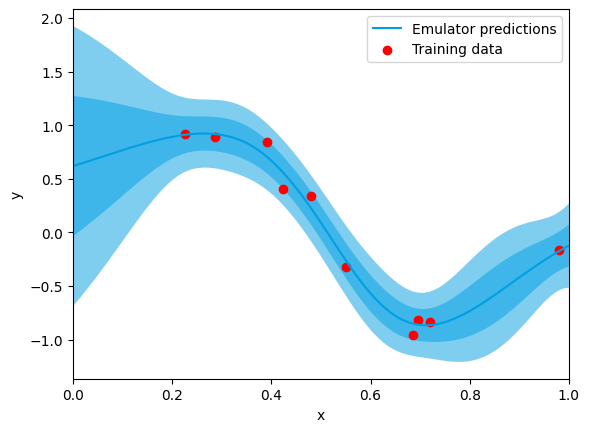

In [14]:
plt = emulator.plot(x_axis="x", y_axis="y", label="Emulator predictions", x_lim=(0, 1))
plt.scatter(df["x"], df["y"], color="r", label="Training data")
plt.legend()
plt.show()

The `Emulator.plot` function internally uses the `Emulator.predict` function. There are a few arguments that can be passed to the `Emulator.predict` function, which can be done using the `tl.PredictParams` object. Refer to [twinLab Parameter Docs](https://twinlab.ai/python/reference/parameters.html#api-parameters) for more information on the parameter objects.

This object contains a parameter called the `observation_noise`. This parameter accounts for the noise in your observations while making predictions. This is by default set to `True` and the plot above shows predictions that account for this noise in the observations.

We can see the uncertainty band to be much thicker even in the regions close to data points. This can be set to `False` and we can plot the predictions again.


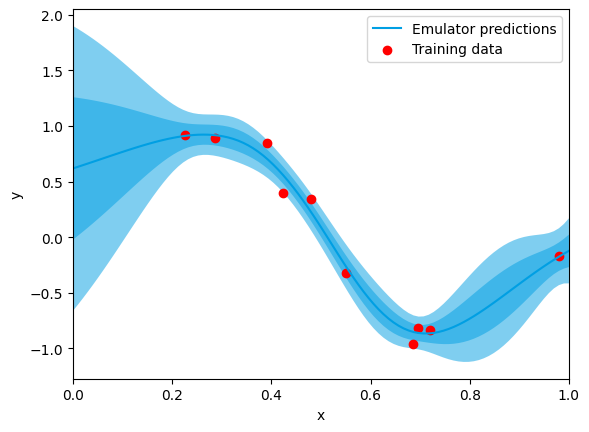

In [15]:
# Set the parameters for prediction
params = tl.PredictParams(observation_noise=False)

# Plot the emulator predictions
plt = emulator.plot(
    x_axis="x", y_axis="y", label="Emulator predictions", params=params, x_lim=(0, 1)
)
plt.scatter(df["x"], df["y"], color="r", label="Training data")
plt.legend()
plt.show()

We can see that the uncertainty band in the middle of the plot has got much thinner, because the emulator now does not account for the noise in the observations and is confident about the predictions in these regions.


### **Sampling from an emulator**

The `Emulator.sample` function can be used to retrieve a number of samples from your emulator. It requires the inputs for which you want the values and how many samples to calculate for each.


In [16]:
# Define the sample inputs
sample_inputs = pd.DataFrame({"x": np.linspace(0, 1, 128)})

# Define number of samples to calculate for each input
num_samples = 100

# Calculate the samples using twinLab
sample_result = emulator.sample(sample_inputs, num_samples)

# View the results in the form of a dataframe
display(sample_result)

y                                                              \
            0         1         2         3         4         5         6   
0   -0.116341  0.779341  0.536348  1.671233  1.505906  0.514525  0.538355   
1   -0.072393  0.783827  0.536354  1.655751  1.484702  0.498978  0.567933   
2   -0.028267  0.791067  0.537721  1.639848  1.458844  0.484679  0.593813   
3    0.013731  0.799697  0.541941  1.621794  1.429699  0.472187  0.615880   
4    0.052223  0.809120  0.551560  1.601519  1.396824  0.462874  0.632965   
..        ...       ...       ...       ...       ...       ...       ...   
123 -0.064136 -0.258900 -0.159008 -0.301982 -0.083684 -0.420226 -0.099552   
124 -0.026482 -0.280648 -0.121262 -0.298811 -0.041992 -0.405334 -0.031378   
125  0.014293 -0.302829 -0.080830 -0.293563 -0.000015 -0.388361  0.037456   
126  0.058428 -0.325471 -0.038826 -0.286717  0.041689 -0.368136  0.104116   
127  0.106982 -0.348234  0.004331 -0.278119  0.082372 -0.345974  0.167226   

                                   ...                                \
            7         8         9  ...        90        91        92   
0    1.035001  0.539906 -0.293576  ...  0.529580  0.706875  0.672583   
1    1.067491  0.574879 -0.236735  ...  0.524207  0.700520  0.680821   
2    1.098681  0.608889 -0.178525  ...  0.522704  0.696220  0.690041   
3    1.129156  0.641891 -0.119735  ...  0.524986  0.694344  0.699008   
4    1.159053  0.673753 -0.060457  ...  0.530278  0.694245  0.706079   
..        ...       ...       ...  ...       ...       ...       ...   
123 -0.112116 -0.216130 -0.085422  ... -0.068671 -0.255243 -0.306849   
124 -0.089916 -0.169049 -0.044676  ... -0.048234 -0.233814 -0.259597   
125 -0.066373 -0.118279 -0.003428  ... -0.028179 -0.211138 -0.211620   
126 -0.039730 -0.063969  0.037920  ... -0.010849 -0.186148 -0.161574   
127 -0.011014 -0.007355  0.080165  ...  0.004788 -0.159609 -0.109259   

                                                                           
           93        94        95        96        97        98        99  
0   -0.190857 -0.336612 -0.781744  0.146344  1.886403  1.416031  0.920967  
1   -0.182997 -0.309892 -0.705427  0.170956  1.855710  1.374805  0.903784  
2   -0.172731 -0.279791 -0.627444  0.197007  1.822940  1.333808  0.891496  
3   -0.159895 -0.245379 -0.547185  0.223870  1.787839  1.294241  0.883520  
4   -0.143683 -0.206837 -0.464786  0.250910  1.749711  1.257432  0.879292  
..        ...       ...       ...       ...       ...       ...       ...  
123 -0.413055 -0.123628 -0.195719 -0.101372 -0.173371 -0.195361 -0.247563  
124 -0.383795 -0.139397 -0.214916 -0.052879 -0.112142 -0.181234 -0.210700  
125 -0.354919 -0.159467 -0.235498 -0.001815 -0.053234 -0.160166 -0.170574  
126 -0.325614 -0.184145 -0.256913  0.050831  0.001132 -0.132191 -0.126450  
127 -0.296066 -0.213692 -0.277374  0.102453  0.051363 -0.097849 -0.079290  

[128 rows x 100 columns]

### **Viewing the results**

The results can be plotted over the top of the previous graph giving a nice visualisation of the sampled data, with the model's uncertainity.


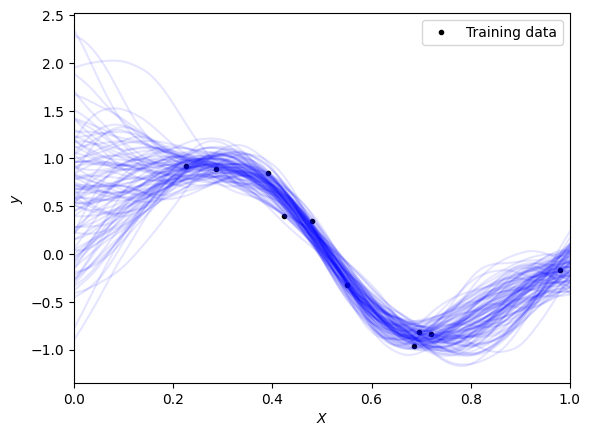

In [17]:
# Plot parameters
color_curve = "blue"
alpha_curve = 0.10
color_data = "black"
plot_training_data = True
plot_model_bands = False

# Plot samples drawn from the model
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color=color_data, label="Training data")
plt.plot(sample_inputs, sample_result["y"], color=color_curve, alpha=alpha_curve)
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

### **Deleting datasets and campaigns**

You can delete your datasets and emulators to keep your cloud account storage tidy. Please be aware that this is permanent. Always consider keeping your data locally backed up. `Emulator.delete` and `Dataset.delete` delete the emulator and the dataset respectively.


In [18]:
# Delete dataset
dataset.delete()

# Delete emulator
emulator.delete()